In [1]:
from main import load_edgelist
from typing import List, Dict
from paco import TimeStampedLinkList, paco
from time import time
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
from baseline import create_temporal_network, get_total_causal_paths
import random
import pandas as pd

In [2]:
dataset = pd.read_csv('CollegeMsg.txt', delimiter=' ', header=None)
dataset.columns = ['source', 'target', 'timestamp']
edge_list = [(row['source'], row['target'], int(row['timestamp'])) for _, row in dataset.iterrows()]

In [3]:
delta = 30
k = 4

In [4]:
data = TimeStampedLinkList.from_edgelist(edge_list)

In [5]:
def random_percentage_subset(input_list, percentage, seed=None):
    if not 0 <= percentage <= 100:
        raise ValueError("Percentage must be between 0 and 100.")

    # Set the seed for reproducibility
    random.seed(seed)

    # Calculate the number of elements to include
    num_elements = int(len(input_list) * (percentage / 100))

    # Randomly select elements
    subset = random.sample(input_list, num_elements)

    return subset

## PaCo

In [6]:
def execute_paco(data, delta, k):     
    start = time()
    C = paco(data, delta, k)
    end = time()
    count = sum(C.values())
    return count, end-start

In [7]:
splits = 5
results = []
for s in trange(1, splits + 1):
    # Get percentage
    percentage = int(100 / splits * s)
    # Split dataset
    n_edges = random_percentage_subset(edge_list, percentage, 28)
    n_links = len(n_edges)
    data = TimeStampedLinkList.from_edgelist(n_edges)
    count, runtime = execute_paco(data, delta, k)
    results.append((count, runtime, round(n_links / 10**3)))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.94it/s]


In [8]:
_, paco_runtimes_sec, paco_n_links = zip(*results)

## Baseline

In [9]:
splits = 5
results = []
for s in trange(1, splits + 1):
    # Get percentage
    percentage = int(100 / splits * s)
    
    # Split dataset
    n_edges = random_percentage_subset(edge_list, percentage, 28)
    n_links = len(n_edges)
    
    # Create pathpy temporal network
    t = create_temporal_network(n_edges)
    
    # Calculate paths
    count, runtime = get_total_causal_paths(t, delta, k)
    
    
    results.append((count, runtime, round(n_links / 10**3)))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11967/11967 [00:00<00:00, 67083.71it/s]

2023-12-17 21:15:07 [Severity.INFO]	Constructing time-unfolded DAG ...


2023-12-17 21:15:10 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		369238
Roots:		11848
Leaves:		357302
Links:		358920
Acyclic:	None

2023-12-17 21:15:10 [Severity.INFO]	Generating causal trees for 11848 root nodes ...
2023-12-17 21:15:11 [Severity.INFO]	finished.


 20%|███████████████████████████████████▍                                                                                                                                             | 1/5 [00:03<00:14,  3.74s/it]

Number of causal paths: Total path count: 		11876.0 
[Unique / Sub paths / Total]: 	[7572.0 / 24013.0 / 35889.0]
Nodes:				1391 
Edges:				7541
Max. path length:		2
Avg path length:		1.0073256988885146 
Paths of length k = 0		0.0 [ 0.0 / 23839.0 / 23839.0 ]
Paths of length k = 1		11789.0 [ 7485.0 / 174.0 / 11963.0 ]
Paths of length k = 2		87.0 [ 87.0 / 0.0 / 87.0 ]





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23934/23934 [00:00<00:00, 66098.35it/s]

2023-12-17 21:15:11 [Severity.INFO]	Constructing time-unfolded DAG ...


2023-12-17 21:15:17 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		734680
Roots:		23569
Leaves:		710812
Links:		717690
Acyclic:	None

2023-12-17 21:15:17 [Severity.INFO]	Generating causal trees for 23569 root nodes ...
2023-12-17 21:15:18 [Severity.INFO]	finished.


 40%|██████████████████████████████████████████████████████████████████████▊                                                                                                          | 2/5 [00:11<00:18,  6.21s/it]

Number of causal paths: Total path count: 		23627.0 
[Unique / Sub paths / Total]: 	[12188.0 / 48172.0 / 71799.0]
Nodes:				1622 
Edges:				12028
Max. path length:		3
Avg path length:		1.0127396622508147 
Paths of length k = 0		0.0 [ 0.0 / 47555.0 / 47555.0 ]
Paths of length k = 1		23341.0 [ 11908.0 / 587.0 / 23928.0 ]
Paths of length k = 2		271.0 [ 265.0 / 30.0 / 301.0 ]
Paths of length k = 3		15.0 [ 15.0 / 0.0 / 15.0 ]





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35901/35901 [00:00<00:00, 66063.61it/s]

2023-12-17 21:15:19 [Severity.INFO]	Constructing time-unfolded DAG ...


2023-12-17 21:15:28 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		1097448
Roots:		35105
Leaves:		1061651
Links:		1076340
Acyclic:	None

2023-12-17 21:15:28 [Severity.INFO]	Generating causal trees for 35105 root nodes ...
2023-12-17 21:15:29 [Severity.INFO]	Analyzing tree 7021/35105 ...
2023-12-17 21:15:29 [Severity.INFO]	Analyzing tree 14042/35105 ...
2023-12-17 21:15:29 [Severity.INFO]	Analyzing tree 21063/35105 ...
2023-12-17 21:15:30 [Severity.INFO]	Analyzing tree 28084/35105 ...
2023-12-17 21:15:30 [Severity.INFO]	Analyzing tree 35105/35105 ...
2023-12-17 21:15:30 [Severity.INFO]	finished.


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 3/5 [00:23<00:17,  8.74s/it]

Number of causal paths: Total path count: 		35211.0 
[Unique / Sub paths / Total]: 	[15758.0 / 72624.0 / 107835.0]
Nodes:				1751 
Edges:				15358
Max. path length:		6
Avg path length:		1.0201073528158815 
Paths of length k = 0		0.0 [ 0.0 / 71130.0 / 71130.0 ]
Paths of length k = 1		34563.0 [ 15160.0 / 1356.0 / 35919.0 ]
Paths of length k = 2		601.0 [ 551.0 / 107.0 / 708.0 ]
Paths of length k = 3		38.0 [ 38.0 / 22.0 / 60.0 ]
Paths of length k = 4		6.0 [ 6.0 / 7.0 / 13.0 ]
Paths of length k = 5		2.0 [ 2.0 / 2.0 / 4.0 ]
Paths of length k = 6		1.0 [ 1.0 / 0.0 / 1.0 ]





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47868/47868 [00:00<00:00, 60617.95it/s]

2023-12-17 21:15:31 [Severity.INFO]	Constructing time-unfolded DAG ...


2023-12-17 21:15:43 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		1457169
Roots:		46527
Leaves:		1409441
Links:		1435140
Acyclic:	None

2023-12-17 21:15:43 [Severity.INFO]	Generating causal trees for 46527 root nodes ...
2023-12-17 21:15:46 [Severity.INFO]	finished.


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 4/5 [00:39<00:11, 11.49s/it]

Number of causal paths: Total path count: 		46689.0 
[Unique / Sub paths / Total]: 	[18822.0 / 97437.0 / 144126.0]
Nodes:				1831 
Edges:				18056
Max. path length:		6
Avg path length:		1.0278866542440404 
Paths of length k = 0		0.0 [ 0.0 / 94680.0 / 94680.0 ]
Paths of length k = 1		45511.0 [ 17761.0 / 2480.0 / 47991.0 ]
Paths of length k = 2		1077.0 [ 963.0 / 225.0 / 1302.0 ]
Paths of length k = 3		83.0 [ 81.0 / 41.0 / 124.0 ]
Paths of length k = 4		14.0 [ 13.0 / 9.0 / 23.0 ]
Paths of length k = 5		3.0 [ 3.0 / 2.0 / 5.0 ]
Paths of length k = 6		1.0 [ 1.0 / 0.0 / 1.0 ]





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 59835/59835 [00:01<00:00, 50554.67it/s]

2023-12-17 21:15:47 [Severity.INFO]	Constructing time-unfolded DAG ...


2023-12-17 21:16:03 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		1814534
Roots:		57872
Leaves:		1754873
Links:		1793940
Acyclic:	None

2023-12-17 21:16:03 [Severity.INFO]	Generating causal trees for 57872 root nodes ...
2023-12-17 21:16:06 [Severity.INFO]	finished.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:59<00:00, 11.97s/it]

Number of causal paths: Total path count: 		58100.0 
[Unique / Sub paths / Total]: 	[21444.0 / 122316.0 / 180416.0]
Nodes:				1899 
Edges:				20296
Max. path length:		6
Avg path length:		1.0334767641996558 
Paths of length k = 0		0.0 [ 0.0 / 118145.0 / 118145.0 ]
Paths of length k = 1		56364.0 [ 19940.0 / 3681.0 / 60045.0 ]
Paths of length k = 2		1582.0 [ 1354.0 / 363.0 / 1945.0 ]
Paths of length k = 3		113.0 [ 111.0 / 96.0 / 209.0 ]
Paths of length k = 4		30.0 [ 28.0 / 25.0 / 55.0 ]
Paths of length k = 5		8.0 [ 8.0 / 6.0 / 14.0 ]
Paths of length k = 6		3.0 [ 3.0 / 0.0 / 3.0 ]




In [10]:
_, baseline_runtimes_sec, baseline_n_links = zip(*results)

## Plots

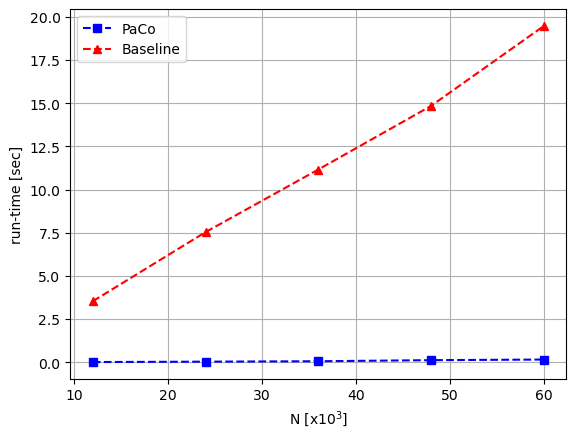

In [11]:
plt.plot(paco_n_links, paco_runtimes_sec, 's--', color='blue',label="PaCo")
plt.plot(baseline_n_links, baseline_runtimes_sec, '^--', color='red',label="Baseline")
plt.xlabel("N [x$10^3$]")
plt.ylabel("run-time [sec]")
plt.grid(True)
plt.legend()
plt.savefig('plots/collegemsg_left_panel.png')
plt.show()